In [2]:
#global libraries
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ALLIE
# Inflation Rate

inflation_raw = pd.read_csv("https://raw.githubusercontent.com/awrubes/AdvProg_Project/refs/heads/main/imf-dm-export-20241213.csv")

inflation_raw.rename(columns={'Inflation rate, end of period consumer prices (Annual percent change)' : 'Country'}, inplace=True)

inflation_raw = inflation_raw.dropna()

inflation_raw_long = inflation_raw.melt(id_vars=['Country'],
                  var_name='Year',
                  value_name='Inflation_Rate')

inflation_raw_long = inflation_raw_long.replace("no data", np.nan)

In [4]:
#keep 2014 onward
countries_to_keep = inflation_raw_long[inflation_raw_long['Year'] >= '2014']

all_countries_inflation = countries_to_keep.dropna()

print(all_countries_inflation.head(10))

#Top countries by GDP
# United States: $25.43 trillion
# China: $14.72 trillion
# Japan: $4.25 trillion
# Germany: $3.85 trillion
# India: $3.41 trillion
# United Kingdom: $2.67 trillion
# France: $2.63 trillion
# Canada: $2.16 trillion
# Italy: $2.04 trillion

countries_to_keep['Inflation_Rate'] = pd.to_numeric(countries_to_keep['Inflation_Rate'], errors="coerce")

countries_to_keep['Country'].unique()

                  Country  Year Inflation_Rate
7718          Afghanistan  2014            1.5
7719              Albania  2014            0.7
7720              Algeria  2014            5.3
7721              Andorra  2014           -0.9
7722               Angola  2014            7.5
7723  Antigua and Barbuda  2014            1.3
7724            Argentina  2014           23.9
7725              Armenia  2014            4.6
7726                Aruba  2014            2.2
7727            Australia  2014            1.7


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 

In [5]:
#copy for dictionary below
countries_dict_ref = countries_to_keep


top_gdp = ['United States', 'China', 'Japan', 'Germany', 'India', 'United Kingdom', 'France', 'Russia', 'Canada', 'Italy']
top_gdp_df = countries_to_keep[countries_to_keep['Country'].isin(top_gdp)]

top_gdp_df.head(10)

,Country,Year,Inflation_Rate
7750,Canada,2014,2.0
7778,France,2014,0.1
7782,Germany,2014,0.2
7795,India,2014,5.3
7801,Italy,2014,0.0
7803,Japan,2014,2.5
7903,United Kingdom,2014,0.5
7904,United States,2014,0.5
7977,Canada,2015,1.3
8005,France,2015,0.3


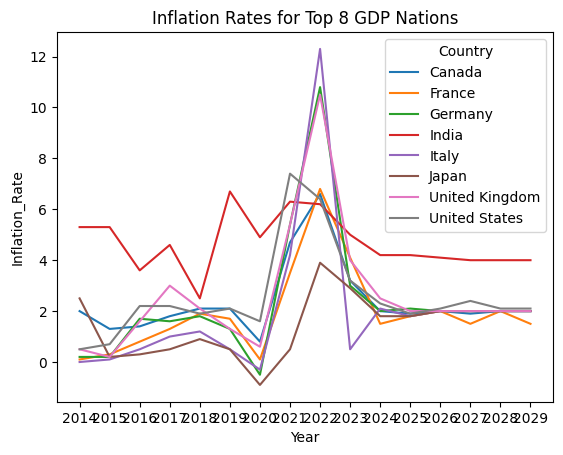

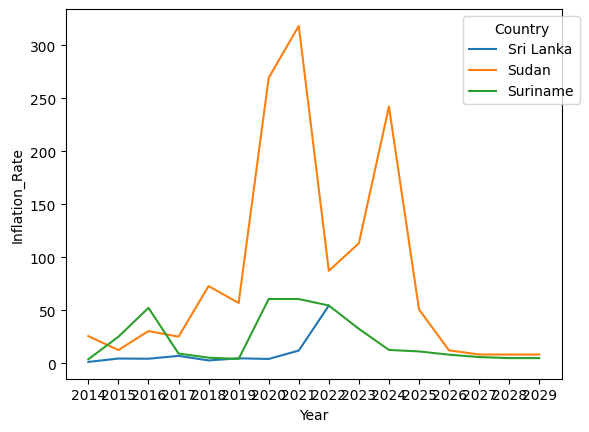

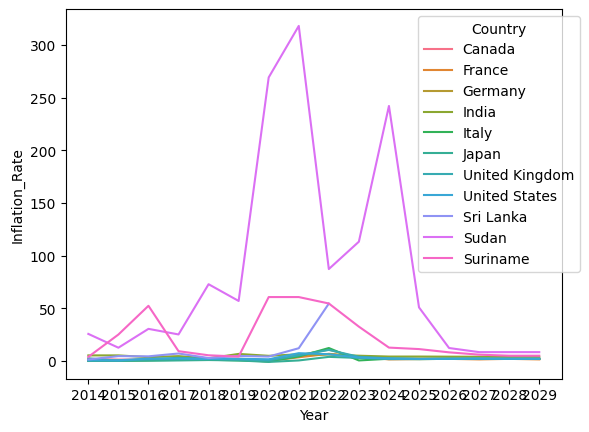

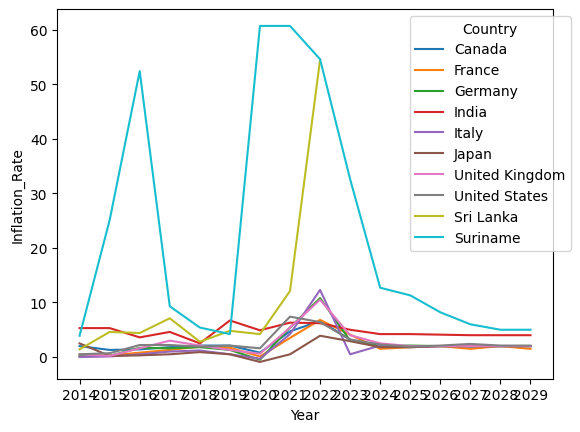

In [6]:
#get the countries with the highest inflation
mean_inflation = countries_to_keep['Inflation_Rate'].mean()
std_inflation = countries_to_keep['Inflation_Rate'].std()
high_inflation_threshold = mean_inflation + std_inflation
high_inflation_countries = countries_to_keep[countries_to_keep['Inflation_Rate'] > high_inflation_threshold].sort_values(by='Inflation_Rate', ascending=False)

mean_high = high_inflation_countries.groupby('Country').agg({'Inflation_Rate': 'mean'}).sort_values(by='Inflation_Rate', ascending=False)

#visualize using seaborn the top 10 countries
ax = (
    sns.lineplot(data=top_gdp_df, x='Year', y='Inflation_Rate', hue='Country')
)
plt.title('Inflation Rates for Top 8 GDP Nations')
plt.show()

#Highest inflation rates
#Sudan                    120.672016
# Turkiye                   63.084122
# Suriname                  50.466966
# Sri Lanka                 49.721102

highest = ['Sudan', 'Turkiye', 'Suriname', 'Sri Lanka']
highest_df = countries_to_keep[countries_to_keep['Country'].isin(highest)]

ax2 = (
    sns.lineplot(data=highest_df, x='Year', y='Inflation_Rate', hue='Country')
)
ax2.legend_.set_bbox_to_anchor((1.05, 1))
plt.show()

combined = pd.concat([top_gdp_df, highest_df])
ax2 = (
    sns.lineplot(data=combined, x='Year', y='Inflation_Rate', hue='Country')
)
ax2.legend_.set_bbox_to_anchor((1.05, 1))
plt.show()

new_combined = combined[combined['Country'] != 'Sudan']

ax2 = (
    sns.lineplot(data=new_combined, x='Year', y='Inflation_Rate', hue='Country')
)
ax2.legend_.set_bbox_to_anchor((1.05, 1))
plt.show()

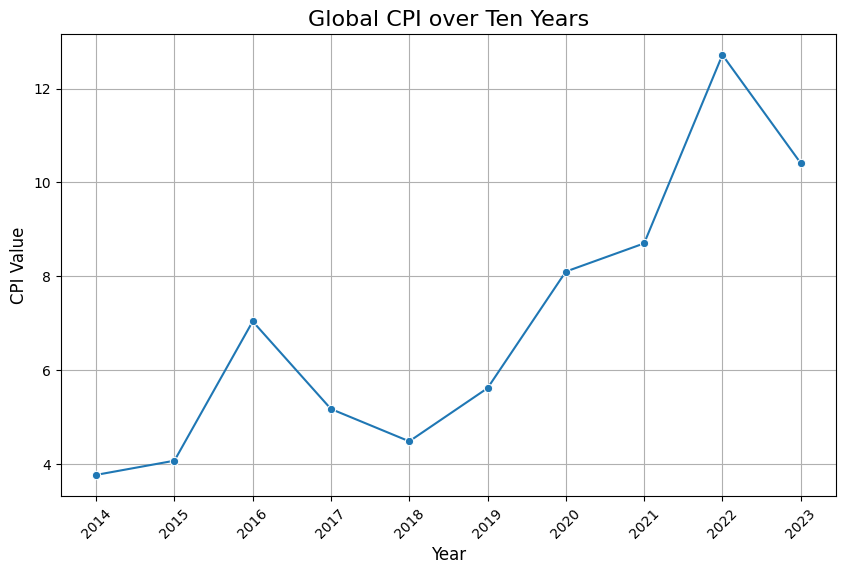

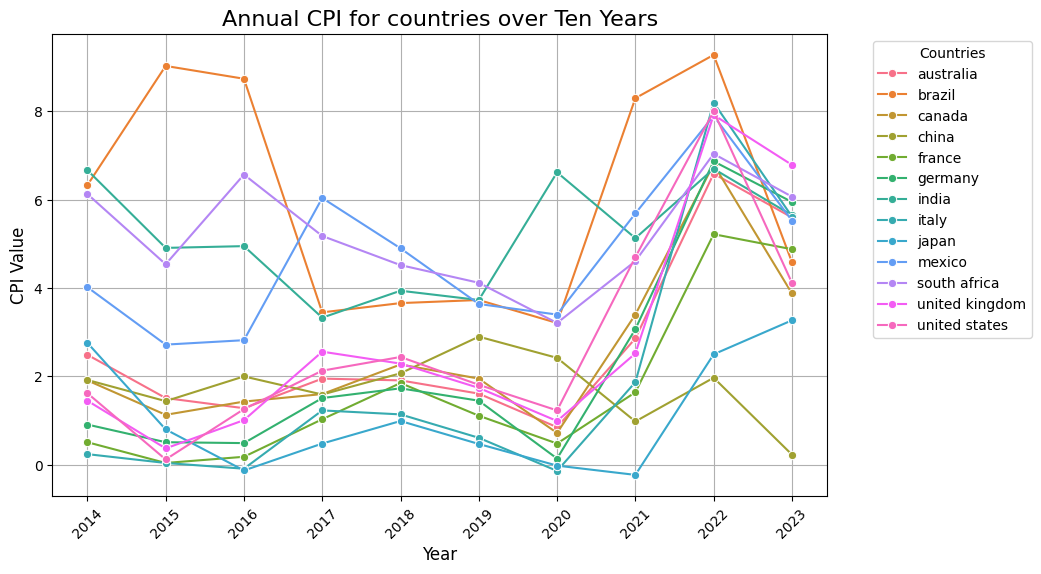

In [7]:
# DHANYA
# CPI , by Country, years : 2014 to 2023

# Downloaded all countries CPI data for last 10 years( 2014- 2023) from International Monetary Fund(IMF)
# https://data.imf.org/?sk=4ffb52b2-3653-409a-b471-d47b46d904b5&sid=1485878855236

# uploaded the same into github

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read raw data
#cpi_raw = pd.read_excel('https://raw.githubusercontent.com/datanerddhanya/DATA602/refs/heads/main/Consumer_Price_Index_CPI.xlsx')
cpi_raw = pd.read_csv('https://raw.githubusercontent.com/datanerddhanya/DATA602/refs/heads/main/CPI_timeSeries_all.csv')


cpi_years = cpi_raw.melt(id_vars=['Country'],
                  var_name='Year',
                  value_name='CPI')


# to remove the text like 'Republic of ', 'Kingdom of ', 'Federative Republic of ',
# 'Islamic Republic of ', 'Democratic Republic of ', 'Commonwealth of '
cpi_years['Country'] = cpi_years['Country'].str.split(',').str[0].str.strip()

#as it has many decimals, rounding to rn2
cpi_years['CPI'] = cpi_years['CPI'].round(2)

cpi_years

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=cpi_years, x='Year', y='CPI', marker='o',errorbar=None)

# Customize the plot
plt.title('Global CPI over Ten Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
plt.grid(True)

# Display the plot
plt.show()


# 1. Convert both country names to lowercase for case-insensitive matching
cpi_years['Country'] = cpi_years['Country'].str.lower()

countries_to_track = ['united states', 'canada', 'brazil', 'united kingdom',
                 'france', 'germany', 'russia', 'italy','mexico', 'china', 'japan',
                 'india', 'australia', 'south africa']
countries_to_track = [country.lower() for country in countries_to_track]

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=cpi_years[cpi_years['Country'].isin(countries_to_track)], x='Year', y='CPI', hue ='Country', marker='o',errorbar=None)

# Customize the plot
plt.title('Annual CPI for countries over Ten Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
plt.grid(True)

# Display the plot
plt.show()


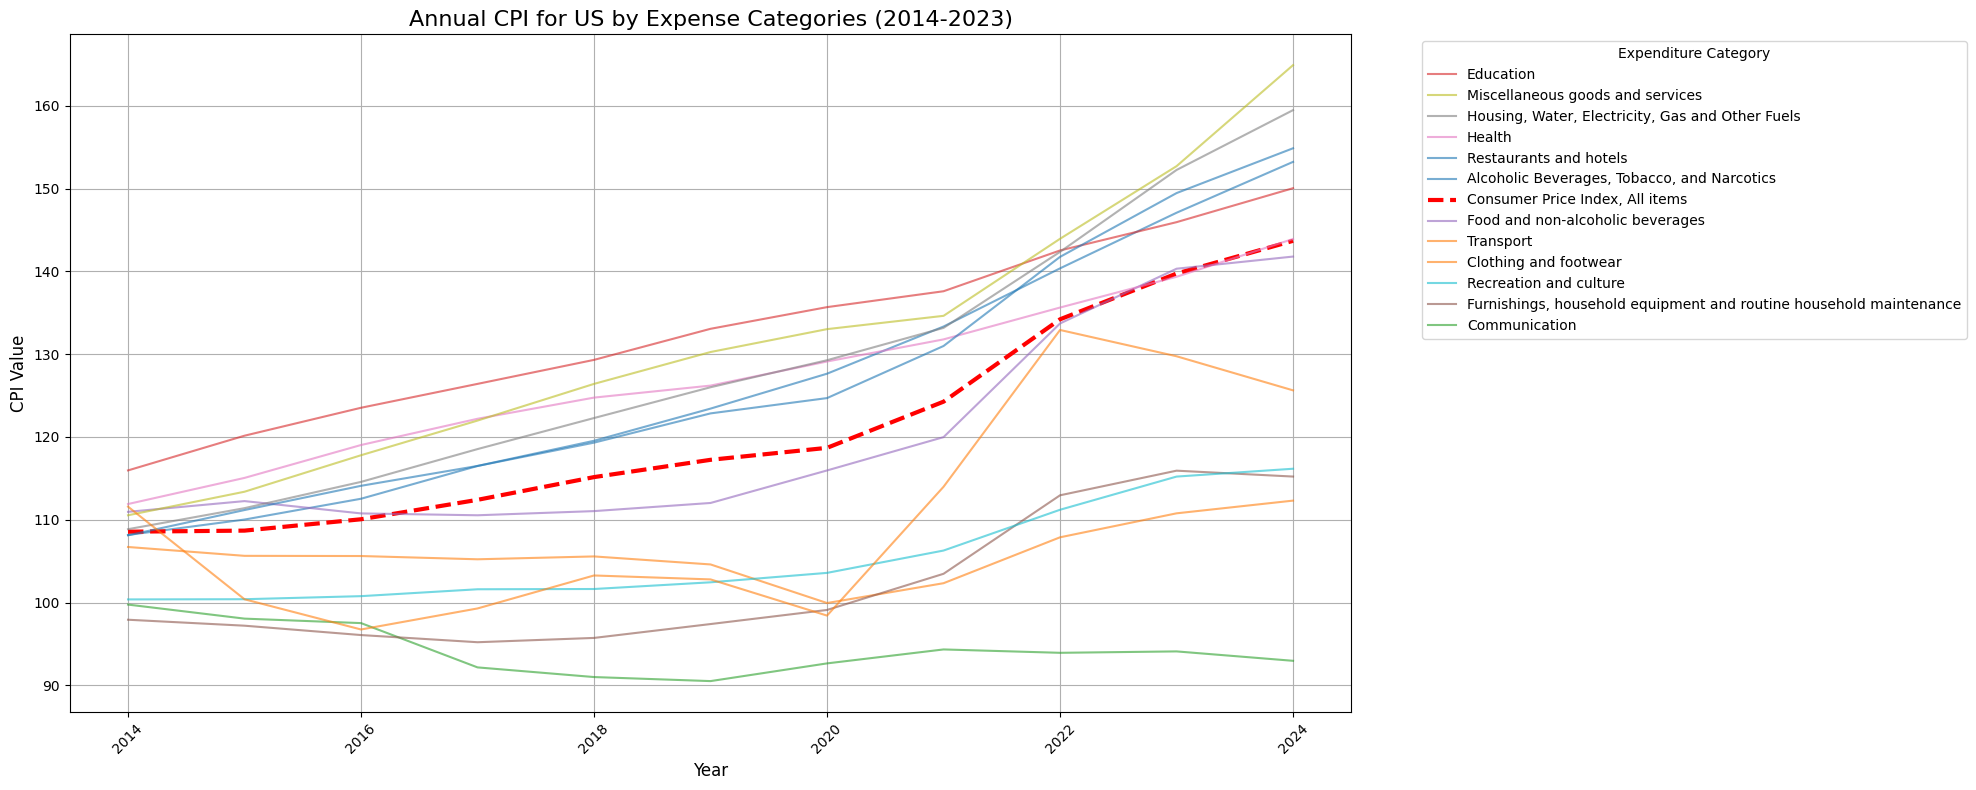

In [8]:
# DHANYA
# CPI for USA, various expense categories,  years : 2014 to 2023

# Downloaded USA CPI data by various expense categories for last 10 years( 2014- 2023) from International Monetary Fund(IMF)
# https://data.imf.org/?sk=4ffb52b2-3653-409a-b471-d47b46d904b5&sid=1485878802128

# uploaded the same into github

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read raw data
cpi_expense_category_raw = pd.read_excel('https://raw.githubusercontent.com/datanerddhanya/DATA602/refs/heads/main/Country_Indexes_by_expenditurecategory.xlsx', skiprows=1)

# Melt the data into a long format
cpi_expense_category_years = cpi_expense_category_raw.melt(id_vars=['Expenditure Category'],
                                                           var_name='MonthYear',
                                                           value_name='CPI')

# Extract 'Year' and 'Month' from 'MonthYear'
cpi_expense_category_years['Year'] = cpi_expense_category_years['MonthYear'].str.split('M').str[0]
cpi_expense_category_years['Month'] = cpi_expense_category_years['MonthYear'].str.split('M').str[1]

# Drop 'MonthYear' as it's no longer needed
cpi_expense_category_years = cpi_expense_category_years.drop(columns=['MonthYear'])

# Convert 'Year' and 'Month' to numeric for plotting and calculations
cpi_expense_category_years['Year'] = pd.to_numeric(cpi_expense_category_years['Year'])
cpi_expense_category_years['Month'] = pd.to_numeric(cpi_expense_category_years['Month'])

# Round 'CPI' to 2 decimal places
cpi_expense_category_years['CPI'] = cpi_expense_category_years['CPI'].round(2)

# Drop NA values
cpi_expense_category_years.dropna(inplace=True)


# Ensure consistent ordering of expenditure categories in the dataframe
cpi_expense_category_years['Expenditure Category'] = pd.Categorical(
    cpi_expense_category_years['Expenditure Category'],
#    categories=sorted_categories.unique(),
    ordered=True)

# Plot the data
plt.figure(figsize=(20, 8))

# Highlight 'Consumer Price Index, All items' differently
for category in cpi_expense_category_years['Expenditure Category'].cat.categories:
    if category == "Consumer Price Index, All items":
        sns.lineplot(data=cpi_expense_category_years[cpi_expense_category_years['Expenditure Category'] == category],
                     x='Year', y='CPI', label=category, color='red', linewidth=3, linestyle='--', ci=None, palette='Set2')
    else:
        sns.lineplot(data=cpi_expense_category_years[cpi_expense_category_years['Expenditure Category'] == category],
                     x='Year', y='CPI', label=category, alpha=0.6, ci=None, palette='Set2')

# Customize the plot
plt.title('Annual CPI for US by Expense Categories (2014-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)

# Sort the labels based on the average CPI for each category
handles, labels = plt.gca().get_legend_handles_labels()

# Sort the labels based on their associated data values
sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: cpi_expense_category_years[cpi_expense_category_years['Expenditure Category'] == x[0]]['CPI'].mean(), reverse=True)

# Reorder legend based on sorted labels
sorted_labels = [x[0] for x in sorted_handles_labels]
sorted_handles = [x[1] for x in sorted_handles_labels]

# Update the legend to reflect sorted order
plt.legend(sorted_handles, sorted_labels, title='Expenditure Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


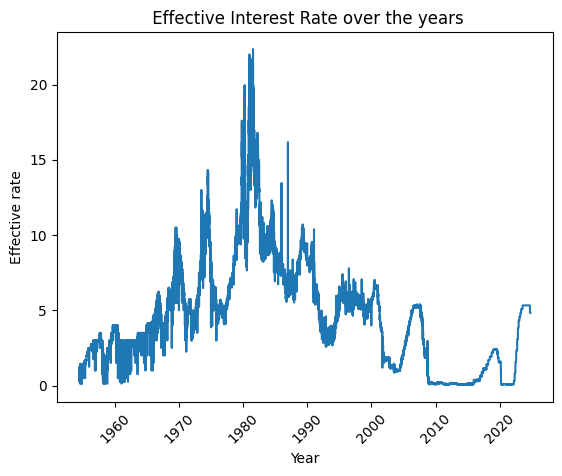

count    25675.000000
mean         4.609498
std          3.589517
min          0.040000
25%          1.820000
50%          4.270000
75%          6.220000
max         22.360000
Name: RIFSPFF_N.D, dtype: float64


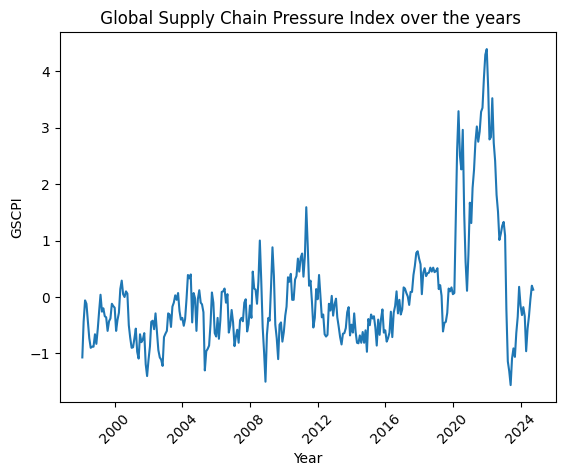

count    321.000000
mean       0.007414
std        1.003802
min       -1.560000
25%       -0.600000
50%       -0.250000
75%        0.200000
max        4.390000
Name: GSCPI, dtype: float64


In [9]:
#interest rates
import pandas as pd
#link to the interest rate data
interest_csv_raw = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/interest%20rate%20FRB_H15.csv"
#read in the interest rate data
interest_df2 = pd.read_csv(interest_csv_raw)
#view data
interest_df2.head()
#remove the first 4 rows of metadata
interest_df = interest_df2.iloc[4:]
#rename the columns to the first row strings
interest_df.columns = interest_df.iloc[0]
#view data frame
interest_df.head()
#ensure the federal funds effective rate are treated as numeric values
interest_df['RIFSPFF_N.D'] = pd.to_numeric(interest_df['RIFSPFF_N.D'], errors='coerce')
#view the data frame
interest_df.head()


#remove the first row that contains an NaN
interest_df = interest_df[1:]
#view the data frame
interest_df.head()
#make the column time period labeled as a date.
interest_df['Time Period'] = pd.to_datetime(interest_df['Time Period'], errors='coerce')

#plotting the data
import matplotlib.pyplot as plt
#plot time period/date as the x axis and the interest rate as y axis
plt.plot(interest_df['Time Period'], interest_df['RIFSPFF_N.D'])

#label the axis and give title
plt.xlabel('Year')
plt.ylabel('Effective rate')
plt.title(' Effective Interest Rate over the years')

#tilt the dates for readability
plt.xticks(rotation=45)
#dipslay plot
plt.show()
#basic statistics on interest rates.
interest_df['RIFSPFF_N.D'].describe()
print(interest_df['RIFSPFF_N.D'].describe())
#supply chain


supply_pressure_csv = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/gscpi_data_global_supply_chain_pressure_index.csv"
#supply chain pressure index put into data frame
supply_pressure_df = pd.read_csv(supply_pressure_csv)
#view data
supply_pressure_df.head()
 # rename column names to avoid errors
new_column_names = ['Date', 'GSCPI', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11']
#assign the new column names
supply_pressure_df.columns = new_column_names
#ensure the data frame has only the columns of interest
supply_pressure_df = supply_pressure_df[['Date', 'GSCPI']]
#remove the blank space/NaN at top of data frame
supply_pressure_df = supply_pressure_df[4:]
#view data frame of supply chain pressure index
supply_pressure_df.head()
#ensure that the date is read as a date
supply_pressure_df['Date'] = pd.to_datetime(supply_pressure_df['Date'], errors='coerce')
#view data frame
supply_pressure_df.head()
#plotting the global supply chain pressure index vs the date
plt.plot(supply_pressure_df['Date'], supply_pressure_df['GSCPI'])
#label the plot and give it a title
plt.xlabel('Year')
plt.ylabel('GSCPI')
plt.title(' Global Supply Chain Pressure Index over the years')
#tilt the x axis labels for readability
plt.xticks(rotation=45)
#display plot
plt.show()
#show basic statistics of global supply chain pressure index
supply_pressure_df['GSCPI'].describe()
print(supply_pressure_df['GSCPI'].describe())


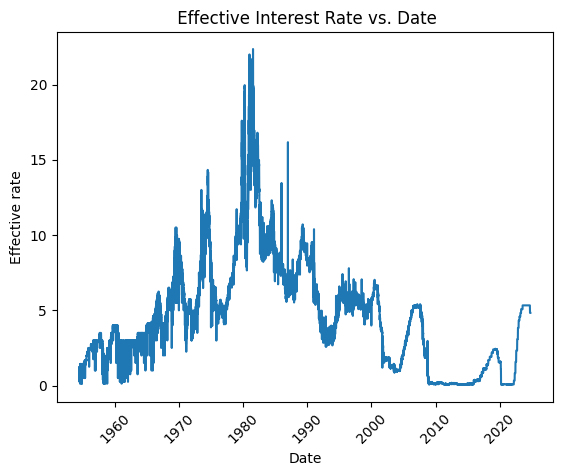

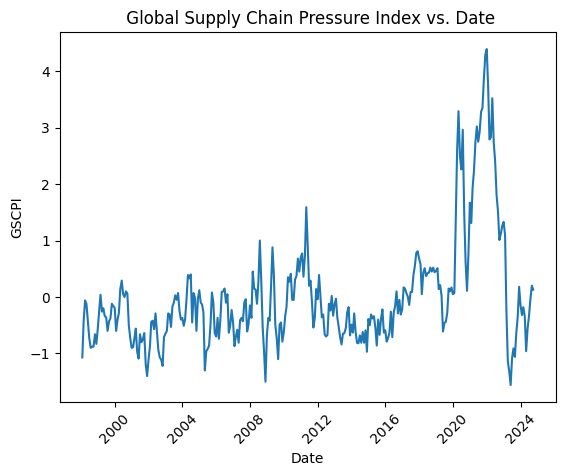

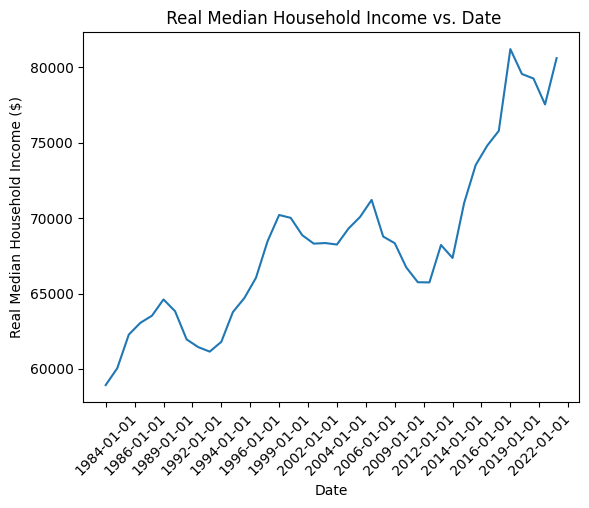

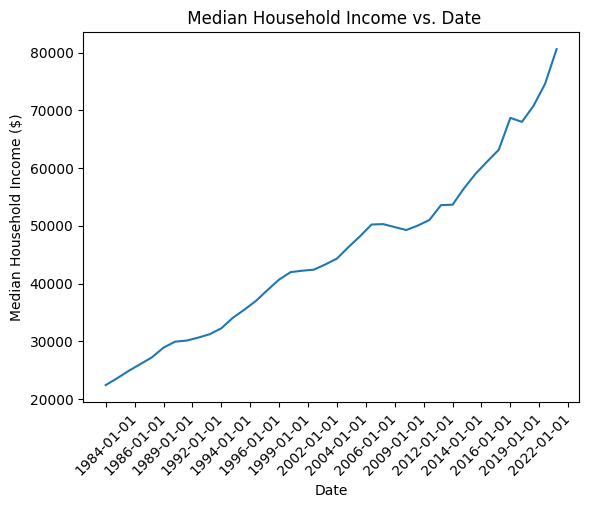

  Economy ISO3 Economy Name       Indicator ID  \
0          ABW        Aruba  IMF.IFS.11____XDC   
1          ABW        Aruba  IMF.IFS.11____XDC   
2          ABW        Aruba  IMF.IFS.11____XDC   
3          ABW        Aruba  IMF.IFS.12A___XDC   
4          ABW        Aruba  IMF.IFS.12A___XDC   

                                           Indicator Attribute 1 Attribute 2  \
0  Monetary, Monetary Authorities, Foreign Assets...      Annual           -   
1  Monetary, Monetary Authorities, Foreign Assets...     Monthly           -   
2  Monetary, Monetary Authorities, Foreign Assets...   Quarterly           -   
3  Monetary, Monetary Authorities, Claims on Cent...      Annual           -   
4  Monetary, Monetary Authorities, Claims on Cent...     Monthly           -   

  Attribute 3 Partner     2014  2014-01  ...  2023  2023-01  2023-02  2023-03  \
0           -       -  1240.86      NaN  ...   NaN      NaN      NaN      NaN   
1           -       -      NaN  1219.76  ...   NaN      

In [10]:
"""
Created on Tue Oct 22 12:47:27 2024

@author: keith
"""
#interest rates
import pandas as pd
#link to the interest rate data
interest_csv_raw = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/interest%20rate%20FRB_H15.csv"
#read in the interest rate data
interest_df2 = pd.read_csv(interest_csv_raw)
#view data
interest_df2.head()
#remove the first 4 rows of metadata
interest_df = interest_df2.iloc[4:]
#rename the columns to the first row strings
interest_df.columns = interest_df.iloc[0]
#view data frame
interest_df.head()
#ensure the federal funds effective rate are treated as numeric values
interest_df['RIFSPFF_N.D'] = pd.to_numeric(interest_df['RIFSPFF_N.D'], errors='coerce')
#view the data frame
interest_df.head()


#remove the first row that contains an NaN
interest_df = interest_df[1:]
#view the data frame
interest_df.head()
#make the column time period labeled as a date.
interest_df['Time Period'] = pd.to_datetime(interest_df['Time Period'], errors='coerce')

#plotting the data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#plot time period/date as the x axis and the interest rate as y axis
plt.plot(interest_df['Time Period'], interest_df['RIFSPFF_N.D'])

#label the axis and give title
plt.xlabel('Date')
plt.ylabel('Effective rate')
plt.title(' Effective Interest Rate vs. Date')

#tilt the dates for readability
plt.xticks(rotation=45)
#dipslay plot
plt.show()
#basic statistics on interest rates.
interest_df['RIFSPFF_N.D'].describe()

#supply chain


supply_pressure_csv = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/gscpi_data_global_supply_chain_pressure_index.csv"
#supply chain pressure index put into data frame
supply_pressure_df = pd.read_csv(supply_pressure_csv)
#view data
supply_pressure_df.head()
 # rename column names to avoid errors
new_column_names = ['Date', 'GSCPI', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11']
#assign the new column names
supply_pressure_df.columns = new_column_names
#ensure the data frame has only the columns of interest
supply_pressure_df = supply_pressure_df[['Date', 'GSCPI']]
#remove the blank space/NaN at top of data frame
supply_pressure_df = supply_pressure_df[4:]
#view data frame of supply chain pressure index
supply_pressure_df.head()
#ensure that the date is read as a date
supply_pressure_df['Date'] = pd.to_datetime(supply_pressure_df['Date'], errors='coerce')
#view data frame
supply_pressure_df.head()
#plotting the global supply chain pressure index vs the date
plt.plot(supply_pressure_df['Date'], supply_pressure_df['GSCPI'])
#label the plot and give it a title
plt.xlabel('Date')
plt.ylabel('GSCPI')
plt.title(' Global Supply Chain Pressure Index vs. Date')
#tilt the x axis labels for readability
plt.xticks(rotation=45)
#display plot
plt.show()
#show basic statistics of global supply chain pressure index
supply_pressure_df['GSCPI'].describe()

real_income_csv = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/real%20median%20household%20income%20MEHOINUSA672N.csv"
#real median household income put into data frame
real_income_df = pd.read_csv(real_income_csv)
#view data
real_income_df.head()

median_income_csv = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/median%20household%20income%20MEHOINUSA646N.csv"
#median household income put into data frame
median_income_df = pd.read_csv(median_income_csv)
#view data
median_income_df.head()

plt.plot(real_income_df['DATE'], real_income_df['MEHOINUSA672N'])

#label the axis and give title
plt.xlabel('Date')
plt.ylabel('Real Median Household Income ($)')
plt.title(' Real Median Household Income vs. Date')

#tilt the dates for readability and reduce the number of x labels

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation=45)
#dipslay plot
plt.show()
real_income_df.describe()

plt.plot(median_income_df['DATE'], median_income_df['MEHOINUSA646N'])

#label the axis and give title
plt.xlabel('Date')
plt.ylabel('Median Household Income ($)')
plt.title(' Median Household Income vs. Date')

#tilt the dates for readability and reduce the number of x axis labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation=45)
#dipslay plot
plt.show()
median_income_df.describe()

#interest by country
country_interest_excel = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/interest_by_country_IMF-IFS.xlsx"
#median household income put into data frame
country_interest_df = pd.read_excel(country_interest_excel)
#view data
print(country_interest_df.head())
country_interest_df.describe()

#GDP per Capita by country

GDP_capita = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/GDP%20per%20capita%20WITS-Country-Timeseries.xlsx"
gdp_capita_df = pd.read_excel(GDP_capita)
#view data
print(gdp_capita_df.head())
gdp_capita_df.describe()

#GNI per capita by country (income)
GNI_capita = "https://github.com/awrubes/AdvProg_Project/raw/refs/heads/main/GNI%20per%20capita%20WITS-Country-Timeseries%20(1).xlsx"
gni_capita_df = pd.read_excel(GNI_capita)
#view data
print(gni_capita_df.head())
gni_capita_df.describe()

#median income yearly data converted to a linear interpolation of data


# Ensure DATE column is datetime
median_income_df['DATE'] = pd.to_datetime(median_income_df['DATE'], errors='coerce')

# Ensure MEHOINUSA646N column is numeric
median_income_df['MEHOINUSA646N'] = pd.to_numeric(median_income_df['MEHOINUSA646N'], errors='coerce')

# Set Month_year as index
median_income_df['Month_year'] = median_income_df['DATE']
median_income_df.set_index('Month_year', inplace=True)

# Drop the DATE column
median_income_df.drop(columns=['DATE'], inplace=True)

# Resample to monthly and interpolate
median_income_df_monthly = median_income_df.resample('MS').interpolate(method='linear')

# Debug: Check the interpolated values
print(median_income_df_monthly)

#real income yearly data converted to a linear interpolation of data
# Ensure DATE column is datetime
real_income_df['DATE'] = pd.to_datetime(real_income_df['DATE'], errors='coerce')

# Ensure MEHOINUSA672N column is numeric
real_income_df['MEHOINUSA672N'] = pd.to_numeric(real_income_df['MEHOINUSA672N'], errors='coerce')

# Set Month_year as index
real_income_df['Month_year'] = real_income_df['DATE']
real_income_df.set_index('Month_year', inplace=True)

# Drop the DATE column
real_income_df.drop(columns=['DATE'], inplace=True)

# Resample to monthly and interpolate
real_income_df_monthly = real_income_df.resample('MS').interpolate(method='linear')

# Debug: Check the interpolated values
print(real_income_df_monthly)


In [11]:
#merging GSCPI with Interest for global dataset

common_dates = set(interest_df['Time Period']).intersection(supply_pressure_df['Date'])
interest_df = interest_df[interest_df['Time Period'].isin(common_dates)]
supply_pressure_df = supply_pressure_df[supply_pressure_df['Date'].isin(common_dates)]

global_merged_df = pd.merge(interest_df, supply_pressure_df, left_on='Time Period', right_on='Date', how='inner')

global_merged_df = global_merged_df.drop("Time Period", axis=1)
global_merged_df.head(10)

,RIFSPFF_N.D,Date,GSCPI
0,5.48,1998-01-31,-1.07
1,5.57,1998-02-28,-0.44
2,5.88,1998-03-31,-0.06
3,5.59,1998-04-30,-0.12
4,5.63,1998-05-31,-0.42
5,7.06,1998-06-30,-0.73
6,5.63,1998-07-31,-0.90
7,5.89,1998-08-31,-0.88
8,6.14,1998-09-30,-0.88
9,5.35,1998-10-31,-0.66


In [12]:
#need to make this comparable to country dataframe, so either mean of each year

global_merged_df['Year'] = global_merged_df['Date'].apply(lambda x: x.year)

global_merged_df_grouped = global_merged_df.groupby('Year')

global_merged_df_means = global_merged_df_grouped.mean()

global_merged_df_grouped.head(5)



,RIFSPFF_N.D,Date,GSCPI,Year
0,5.48,1998-01-31,-1.07,1998
1,5.57,1998-02-28,-0.44,1998
2,5.88,1998-03-31,-0.06,1998
3,5.59,1998-04-30,-0.12,1998
4,5.63,1998-05-31,-0.42,1998
...,...,...,...,...
312,5.33,2024-01-31,-0.32,2024
313,5.33,2024-02-29,-0.18,2024
314,5.33,2024-03-31,-0.34,2024
315,5.33,2024-04-30,-0.96,2024


In [13]:
global_merged_df_means = global_merged_df_means.drop("Date", axis=1)

global_merged_df_means.head(5)

,RIFSPFF_N.D,GSCPI
Year,,
1998,5.616667,-0.629167
1999,5.034167,-0.269167
2000,6.345833,-0.230833
2001,3.829167,-0.900000
2002,1.699167,-0.741667


In [14]:
gdp_capita_df.columns
gdp_long = gdp_capita_df.melt(
    id_vars=['Country Name', 'Indicator Name'],  # Columns to keep
    var_name='Year',  # New column for years
    value_name='GDP per Capita'
)
gni_long = gni_capita_df.melt(
    id_vars=['Country Name', 'Indicator Name'],  # Columns to keep
    var_name='Year',  # New column for years
    value_name='GNI per capita '  # New column for GDP values
)

gni_long.rename(columns={'Country Name' : 'Country'}, inplace=True)
gdp_long.rename(columns={'Country Name' : 'Country'}, inplace=True)
gdp_long = gdp_long.drop('Indicator Name', axis=1)
gni_long = gni_long.drop('Indicator Name', axis=1)


In [15]:
#strip whitespace and set to lowercase
def preprocess_countries(df, column_name='Country'):
    # Strip whitespace, replace "and" and "&", and convert to lowercase
    df[column_name] = df[column_name].str.strip().str.replace(' and ', '').str.replace('&', '').str.replace(' ', '').str.lower()
    return df

# Apply preprocessing to all dataframes
cpi_years = preprocess_countries(cpi_years)
all_countries_inflation = preprocess_countries(all_countries_inflation)
gdp_long = preprocess_countries(gdp_long)
gni_long = preprocess_countries(gni_long)

In [16]:
#all global dataframes for merging
all_countries_inflation['Country'].replace("china,people'srepublicof", 'china', inplace=True)
countries_dict_ref['Country'].replace("China, People's Republic of", 'China', inplace=True)

In [17]:
# Find common countries across all dataframes
common_countries = set(cpi_years['Country']) & set(all_countries_inflation['Country']) & set(gdp_long['Country']) & set(gni_long['Country'])

country_merged_df = pd.merge(cpi_years, all_countries_inflation, on=['Country', 'Year'], how='inner')
country_merged_df = pd.merge(country_merged_df, gdp_long, on=['Country', 'Year'], how='inner')
country_merged_df = pd.merge(country_merged_df, gni_long, on=['Country', 'Year'], how='inner')

In [18]:
print(len(common_countries))

151


In [19]:
#Merged Dataframes
#contains, GDP, GNI, CPI, Inflation
country_merged_df['Inflation_Rate'] = pd.to_numeric(country_merged_df['Inflation_Rate'], errors="coerce")

In [20]:
#DROP NaN ROWS
country_merged_df = country_merged_df.dropna(subset=['CPI', 'Inflation_Rate', 'GDP per Capita', 'GNI per capita '])

In [21]:
unique_countries = country_merged_df['Country'].unique()
total_unique_countries = len(unique_countries)
print(total_unique_countries)

150


In [22]:
country_dict = {name.replace(' and ', '').replace('&', '').replace(' ', '').strip().lower(): name
                for name in countries_dict_ref['Country']}

country_merged_df['Country'] = country_merged_df['Country'].map(country_dict)

country_merged_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador',
       'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia

In [23]:
#Merged Dataframes
#Dhanya
global_merged_df_means.rename(columns={'RIFSPFF_N.D':'Interest_Rate','GSCPI':'Supply_Chain_Pressure_Index'},inplace=True)
global_merged_df_means.head(10)


,Interest_Rate,Supply_Chain_Pressure_Index
Year,,
1998,5.616667,-0.629167
1999,5.034167,-0.269167
2000,6.345833,-0.230833
2001,3.829167,-0.900000
2002,1.699167,-0.741667
2003,1.190000,-0.247500
2004,1.425833,-0.060833
2005,3.366667,-0.531667
2006,5.058333,-0.253333


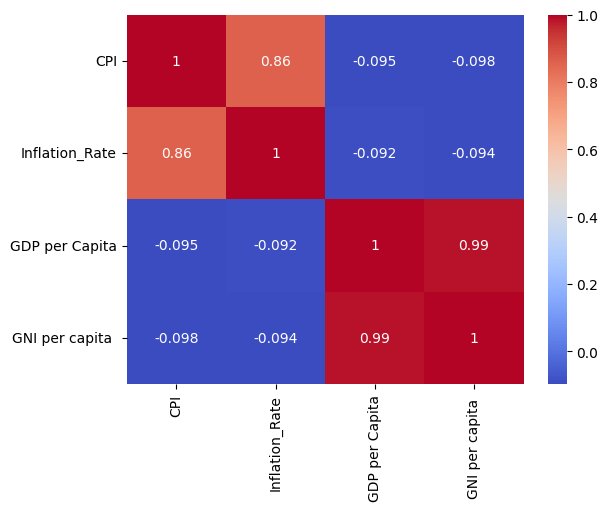

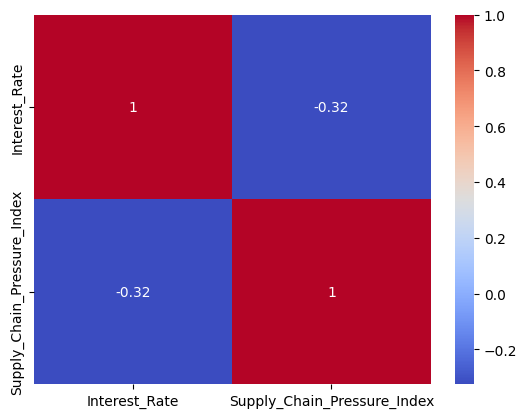

               Country  Year   CPI  Inflation_Rate  GDP per Capita  \
0          Afghanistan  2014  4.67             1.5      628.146804   
1              Albania  2014  1.63             0.7     4578.633208   
2              Algeria  2014  2.92             5.3     5516.229463   
3               Angola  2014  7.28             7.5     5059.080441   
4  Antigua and Barbuda  2014  1.09             1.3    14004.811212   

   GNI per capita   
0            650.0  
1           4540.0  
2           5510.0  
3           4800.0  
4          13230.0  
      Interest_Rate  Supply_Chain_Pressure_Index
Year                                            
1998       5.616667                    -0.629167
1999       5.034167                    -0.269167
2000       6.345833                    -0.230833
2001       3.829167                    -0.900000
2002       1.699167                    -0.741667
   Year  Interest_Rate  Supply_Chain_Pressure_Index
0  1998       5.616667                    -0.629167
1  199

In [24]:
#keith correlations

#correlations in the country data frame
corrcountry = country_merged_df.corr(numeric_only=True)

# heatmap of country data frame
sns.heatmap(corrcountry, annot=True, cmap='coolwarm')
plt.show()
#CPI is most dependent on inflation rather than GNI/GDP

#global data frame correllations
correlation_global = global_merged_df_means.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(correlation_global, annot=True, cmap='coolwarm')
plt.show()

print(country_merged_df.head()) #CPI inflation GDP per capita GNI per capita
print(global_merged_df_means.head())

# Reset index if 'Year' is the index in any DataFrame
if 'Year' in country_merged_df.index.names:
    country_merged_df.reset_index(inplace=True)

if 'Year' in global_merged_df_means.index.names:
    global_merged_df_means.reset_index(inplace=True)

#first make sure Year from both dataframes are the same type.
country_merged_df['Year'] = country_merged_df['Year'].astype(int)  # Convert to string
global_merged_df_means['Year'] = global_merged_df_means['Year'].astype(int)  # Convert to string

# Year converted from index to column display
print(global_merged_df_means.head())

In [36]:
#merge global_merged_df_means and country_merged_df.head() by year

#make sure the types have changed
print(country_merged_df.dtypes)
print(global_merged_df_means.dtypes)

# Merging on the 'year' column
country_global_df = pd.merge(country_merged_df, global_merged_df_means , on='Year')
#successfully merged
print(country_global_df.head())
print(country_global_df.columns)
#remove the unnecessary columns if the above is run more than once
#country_global_df = country_global_df.drop(['level_0', 'index'], axis=1)

#correlations between CPI, inflation, interest, GNI per capita, GDP per capita, Global supply chain index all countries treated as one
correlation_all = country_global_df.corr(numeric_only=True)

# correlation heatmap of all countries treated as one
sns.heatmap(correlation_all, annot=True, cmap='coolwarm')
plt.show()

# Select only numeric columns for correlation matrix
numeric_cols = country_global_df.select_dtypes(include=['int64', 'float64']).columns

# Group by country and calculate correlation matrix for each country
correlations_country = country_global_df.groupby('Country')[numeric_cols].corr()

#view the correlations
print(correlations_country.columns)
print(correlations_country)

#selecting the correlations for one country
print(correlations_country.loc['United States'])

# Loop through each country and plot the correlation matrix
top_gdp = ['Switzerland', 'United States', 'China', 'Japan', 'Germany', 'India', 'United Kingdom', 'France', 'Russian Federation', 'Canada', 'Italy', 'Luxembourg']


# Loop through the countries of interest and plot the correlation matrix
for country, corr_matrix in correlations_country.groupby(level=0):
    if country in top_gdp:  # Only proceed if the country is in top_gdp
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
        plt.title(f'Correlation Matrix for {country}')
        plt.show()


                                 Year       CPI  Inflation_Rate  \
Year                         1.000000  0.746399        0.796108   
CPI                          0.746399  1.000000        0.864810   
Inflation_Rate               0.796108  0.864810        1.000000   
GDP per Capita               0.948938  0.898013        0.870635   
GNI per capita               0.956565  0.873074        0.847906   
Interest_Rate                0.433813  0.399783        0.144956   
Supply_Chain_Pressure_Index  0.894472  0.728456        0.872337   

                             GDP per Capita  GNI per capita   Interest_Rate  \
Year                               0.948938         0.956565       0.433813   
CPI                                0.898013         0.873074       0.399783   
Inflation_Rate                     0.870635         0.847906       0.144956   
GDP per Capita                     1.000000         0.995265       0.490857   
GNI per capita                     0.995265         1.000000       0

In [26]:
# Macroeconomic Trend Analysis
# Dhanya

# Round specific columns to 2 decimal places
columns_to_round = ['Inflation_Rate', 'GDP per Capita', 'GNI per capita ', 'Interest_Rate', 'Supply_Chain_Pressure_Index']
country_global_df[columns_to_round] = country_global_df[columns_to_round].round(2)

#Descriptive statistics
print("\nDescriptive Statistics:")

print(country_global_df.describe())



Descriptive Statistics:
              Year          CPI  Inflation_Rate  GDP per Capita  \
count  1298.000000  1298.000000     1298.000000     1298.000000   
mean   2017.955316     5.257935        5.831587    15852.200023   
std       2.569828    19.033732       21.179237    21337.949008   
min    2014.000000    -3.750000       -5.900000      216.830000   
25%    2016.000000     0.990000        1.000000     2404.810000   
50%    2018.000000     2.720000        2.900000     6228.460000   
75%    2020.000000     5.585000        6.200000    18776.107500   
max    2022.000000   557.200000      521.100000   133590.150000   

       GNI per capita   Interest_Rate  Supply_Chain_Pressure_Index  
count      1298.000000    1298.000000                  1298.000000  
mean      15360.801233       0.846695                     0.643012  
std       19944.375338       0.820410                     1.220573  
min         220.000000       0.060000                    -0.670000  
25%        2442.500000    

In [27]:
country_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1298 entries, 0 to 1356
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1298 non-null   object 
 1   Year             1298 non-null   int64  
 2   CPI              1298 non-null   float64
 3   Inflation_Rate   1298 non-null   float64
 4   GDP per Capita   1298 non-null   float64
 5   GNI per capita   1298 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


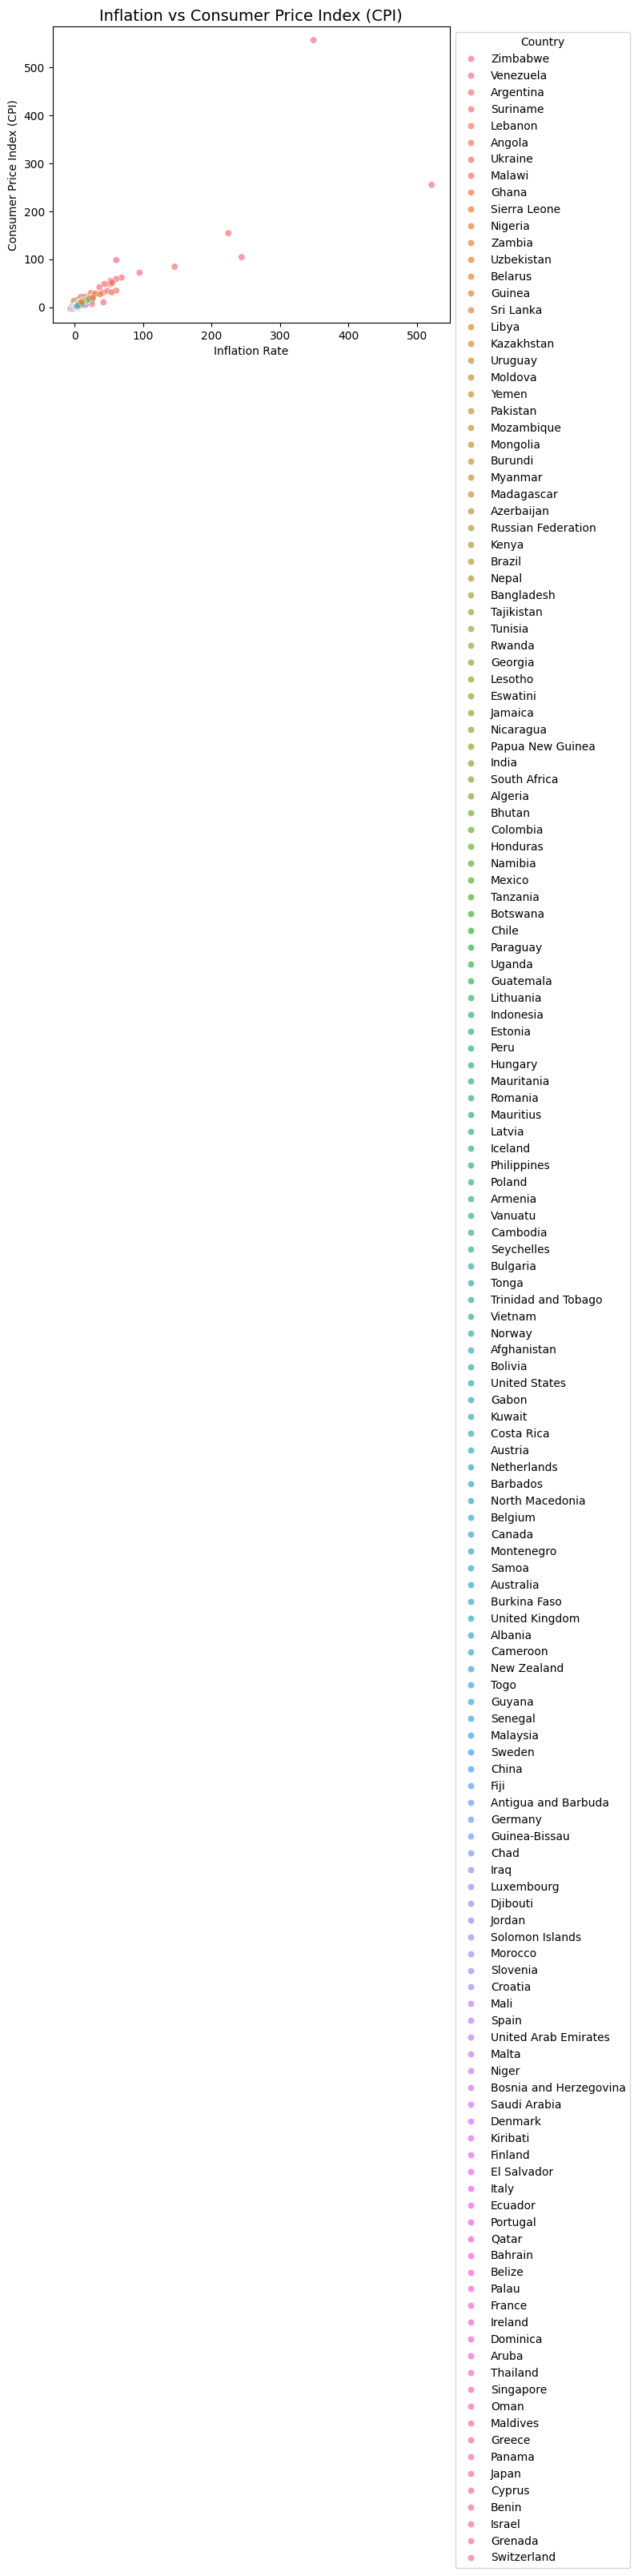

In [28]:
# Macroeconomic Trend Analysis
# Dhanya

country_merged_df['Inflation_Rate'] = country_merged_df['Inflation_Rate'].astype(float)


# Calculate the average CPI and Inflation for each country
country_avg = country_merged_df.groupby('Country')[['CPI', 'Inflation_Rate']].mean().sort_values(by=['CPI', 'Inflation_Rate'], ascending=False)

# Reorder the hue parameter based on these sorted countries
order = country_avg.index.tolist()

# 1. Scatter Plot: Inflation vs CPI
sns.scatterplot(data=country_merged_df, x='Inflation_Rate', y='CPI',
                    hue='Country', hue_order=order, alpha=0.7 )
plt.title('Inflation vs Consumer Price Index (CPI)', fontsize=14)
plt.xlabel('Inflation Rate')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Dominica'
 'Ecuador' 'El Salvador' 'Estonia' 'Eswatini' 'Fiji' 'Finland' 'France'
 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Latvia' 'Lebanon' 'Lesotho'
 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia'
 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia'
 'Nepal' 'Netherlands' 'New Z

Text(0, 0.5, 'Value')

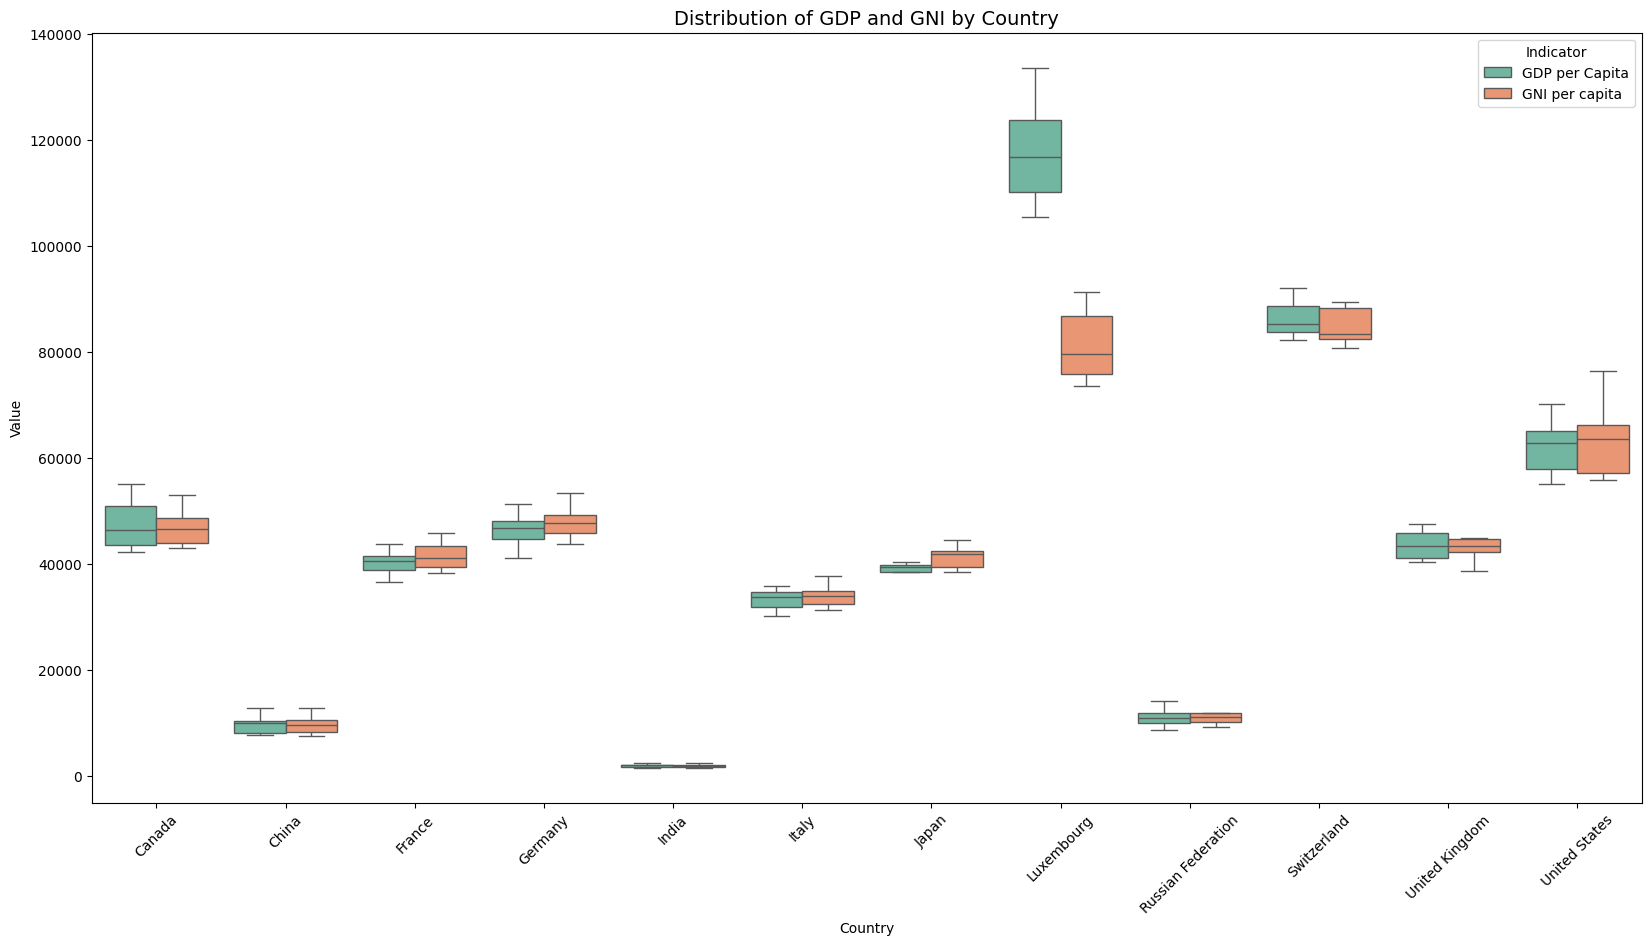

In [29]:
# Dhanya

#group countries with high
#Top countries by GDP
# luxembourg
# switzerland
# United States: $25.43 trillion
# China: $14.72 trillion
# Japan: $4.25 trillion
# Germany: $3.85 trillion
# India: $3.41 trillion
# United Kingdom: $2.67 trillion
# France: $2.63 trillion
# Canada: $2.16 trillion
# Italy: $2.04 trillion
#bottom countries GDP

print(country_merged_df['Country'].unique())
top_gdp = ['Switzerland', 'United States', 'China', 'Japan', 'Germany', 'India', 'United Kingdom', 'France', 'Russian Federation', 'Canada', 'Italy', 'Luxembourg']
top_gdp_df = country_merged_df[country_merged_df['Country'].isin(top_gdp)]

#2. Boxplot: Distribution of Economic Indicators by Country
plt.figure(figsize=(20, 10))
visual2_indicators = ['GDP per Capita', 'GNI per capita ']
melted_df = top_gdp_df.melt(id_vars=['Country', 'Year'],
                                       value_vars=visual2_indicators,
                                       var_name='Indicator', value_name='Value')

sns.boxplot(data=melted_df, x='Country', y='Value', hue='Indicator', palette='Set2', showfliers=False)
plt.title('Distribution of GDP and GNI by Country', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Value')




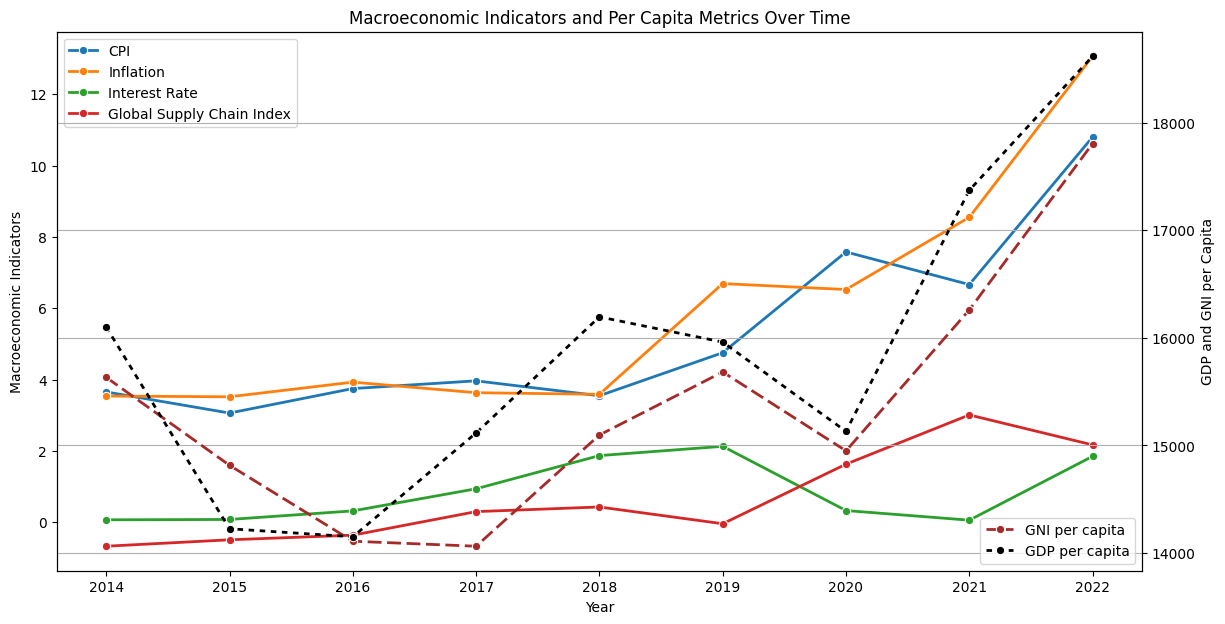

In [30]:
# Dhanya

plt.figure(figsize=(14, 7))

# Plotting the first set of indicators (CPI, Inflation, etc.)
sns.lineplot(
    x=country_global_df['Year'],
    y=country_global_df['CPI'],
    label='CPI',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_global_df['Year'],
    y=country_global_df['Inflation_Rate'],
    label='Inflation',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_global_df['Year'],
    y=country_global_df['Interest_Rate'],
    label='Interest Rate',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_global_df['Year'],
    y=country_global_df['Supply_Chain_Pressure_Index'],
    label='Global Supply Chain Index',
    marker='o',
    linewidth=2,
    ci=None
)

# Adding the secondary y-axis for GDP and GNI
ax = plt.gca()  # Get current axis
ax2 = ax.twinx()  # Create secondary y-axis

sns.lineplot(
    x=country_global_df['Year'],
    y=country_global_df['GNI per capita '],
    label='GNI per capita',
    color='brown',
    marker='o',
    dashes=(5, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)
sns.lineplot(
    x=country_global_df['Year'],
    y=country_global_df['GDP per Capita'],
    label='GDP per capita',
    color='black',
    marker='o',
    dashes=(2, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)

# Set labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Macroeconomic Indicators')
ax2.set_ylabel('GDP and GNI per Capita')
plt.title('Macroeconomic Indicators and Per Capita Metrics Over Time')

# Add legends for both axes
ax.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.grid(True)
plt.show()


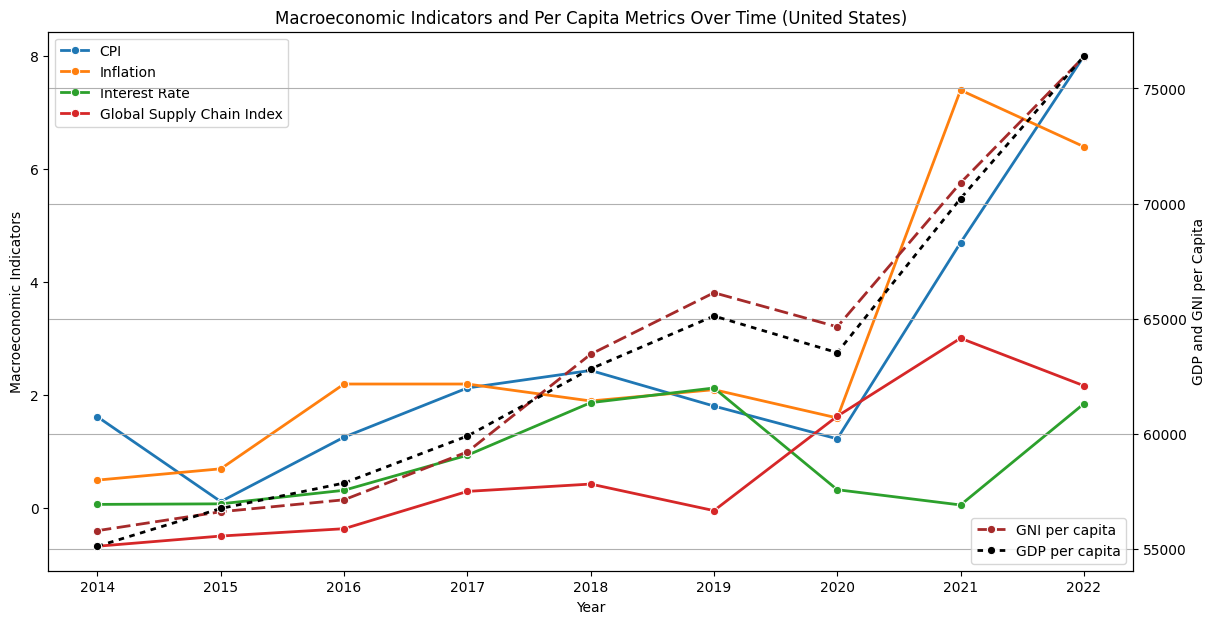

In [31]:
# Dhanya

#Filter data for United States
country_us_df = country_global_df[country_global_df['Country'] == 'United States']

plt.figure(figsize=(14, 7))

# Plotting the first set of indicators (CPI, Inflation, etc.)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['CPI'],
    label='CPI',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Inflation_Rate'],
    label='Inflation',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Interest_Rate'],
    label='Interest Rate',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Supply_Chain_Pressure_Index'],
    label='Global Supply Chain Index',
    marker='o',
    linewidth=2,
    ci=None
)

# Adding the secondary y-axis for GDP and GNI
ax = plt.gca()  # Get current axis
ax2 = ax.twinx()  # Create secondary y-axis

sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['GNI per capita '],
    label='GNI per capita',
    color='brown',
    marker='o',
    dashes=(5, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['GDP per Capita'],
    label='GDP per capita',
    color='black',
    marker='o',
    dashes=(2, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)

# Set labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Macroeconomic Indicators')
ax2.set_ylabel('GDP and GNI per Capita')
plt.title('Macroeconomic Indicators and Per Capita Metrics Over Time (United States)')

# Add legends for both axes
ax.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.grid(True)
plt.show()


In [32]:
# Dhanya


#keith: real_income_df already had the income per year.  real_income_df_monthly had a linear interpolation from year to year by month
#taking the mean of the year is not needed
#reassigned us_household_income to fixed real_income_df

real_income_df.reset_index(inplace=True)

real_income_df.head()
#Rename the column 'Month_year' to 'Year'
real_income_df.rename(columns={"Month_year": "Year"}, inplace=True)

#Extract only the year from the 'Year' column
real_income_df['Year'] = pd.to_datetime(real_income_df['Year']).dt.year

#Rename 'MEHOINUSA672N' to 'Household Income'
real_income_df.rename(columns={"MEHOINUSA672N": "Household Income"}, inplace=True)

# Display the updated DataFrame
print(real_income_df)
real_income_df.columns
#force us_household_income to only have year and household income
us_household_income = real_income_df[['Year', 'Household Income']]
#merge the country us data with the us household income data
country_us_df = pd.merge(country_us_df, us_household_income, on='Year', how='left')
country_us_df.head(5)
country_us_df.columns


    Year  Household Income
0   1984             58930
1   1985             60050
2   1986             62280
3   1987             63060
4   1988             63530
5   1989             64610
6   1990             63830
7   1991             61960
8   1992             61450
9   1993             61150
10  1994             61800
11  1995             63770
12  1996             64710
13  1997             66050
14  1998             68470
15  1999             70210
16  2000             70020
17  2001             68870
18  2002             68310
19  2003             68350
20  2004             68250
21  2005             69310
22  2006             70080
23  2007             71210
24  2008             68780
25  2009             68340
26  2010             66730
27  2011             65750
28  2012             65740
29  2013             68220
30  2014             67360
31  2015             71000
32  2016             73520
33  2017             74810
34  2018             75790
35  2019             81210
3

Index(['Country', 'Year', 'CPI', 'Inflation_Rate', 'GDP per Capita',
       'GNI per capita ', 'Interest_Rate', 'Supply_Chain_Pressure_Index',
       'Household Income'],
      dtype='object')

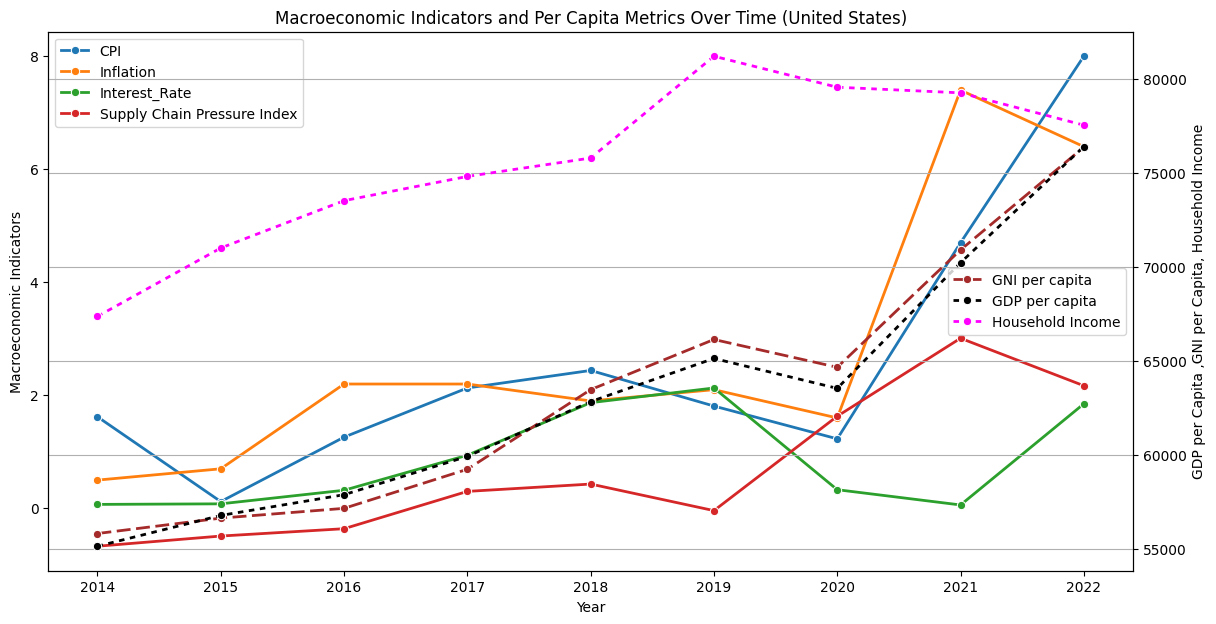

In [33]:
# Dhanya
# Including Household income to the United states chart

plt.figure(figsize=(14, 7))

# Plotting the first set of indicators (CPI, Inflation, etc.)

sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['CPI'],
    label='CPI',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Inflation_Rate'],
    label='Inflation',
    marker='o',
    linewidth=2,
    ci=None
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Interest_Rate'],
    label='Interest_Rate',
    marker='o',
    linewidth=2,
    ci=None
)

sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Supply_Chain_Pressure_Index'],
    label='Supply Chain Pressure Index',
    marker='o',
    linewidth=2,
    ci=None
)


# Adding the secondary y-axis for GDP and GNI and Household Income
ax = plt.gca()  # Get current axis
ax2 = ax.twinx()  # Create secondary y-axis

sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['GNI per capita '],
    label='GNI per capita',
    color='brown',
    marker='o',
    dashes=(5, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)
sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['GDP per Capita'],
    label='GDP per capita',
    color='black',
    marker='o',
    dashes=(2, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)

sns.lineplot(
    x=country_us_df['Year'],
    y=country_us_df['Household Income'],
    label='Household Income',
    color='Magenta',
    marker='o',
    dashes=(2, 2),  # Dash pattern
    linewidth=2,
    ci=None,
    ax=ax2
)
# Set labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Macroeconomic Indicators')
ax2.set_ylabel('GDP per Capita ,GNI per Capita, Household Income')
plt.title('Macroeconomic Indicators and Per Capita Metrics Over Time (United States)')

# Add legends for both axes
ax.legend(loc='upper left')
ax2.legend(loc='center right')

plt.grid(True)
plt.show()


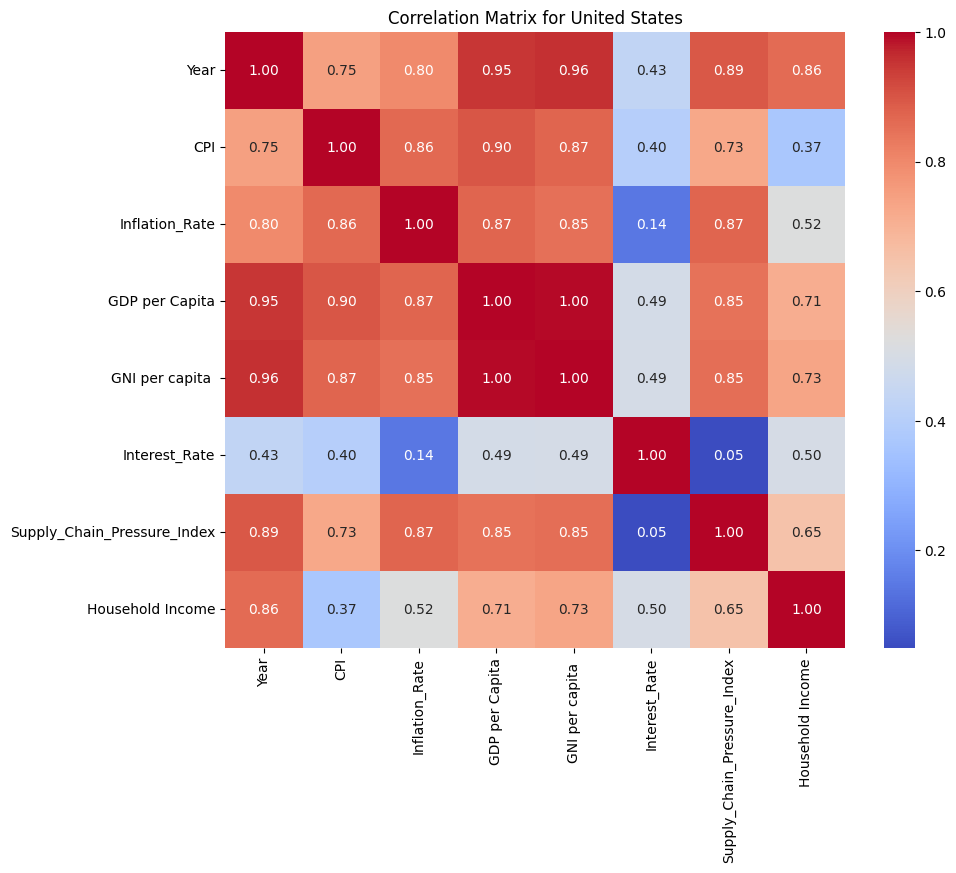

In [34]:
# Dhanya

# Calculate the correlation matrix for the numeric columns of country_us_df
correlation_us = country_us_df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_us, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for United States')
plt.show()

The correlations between CPI (Consumer Price Index), inflation, interest rates, the Global Supply Chain Pressure Index (GSCPI), GDP per capita, GNI per capita, and household income in the United States over the last decade reveals the following general patterns:




1.   CPI and Inflation: These two indicators are highly correlated, as CPI is a measure of inflation based on changes in consumer prices. The annual correlation is typically strong, reflecting direct relationships between price levels and inflation trends​
2.  Interest Rates and Inflation: Interest rates tend to have an inverse relationship with inflation. Higher inflation often leads to higher interest rates as the Federal Reserve raises rates to control inflation. Recent data shows this relationship is evident over the last decade
3. GSCPI (Supply Chain Pressure Index): The GSCPI reflects disruptions in supply chains and has been positively associated with inflation spikes, particularly during periods like the COVID-19 pandemic. High supply chain pressures exacerbate inflationary trends
4. GDP per Capita and GNI per Capita: These two measures are tightly correlated as they both track economic productivity and income. Over time, both have shown gradual increases, but inflation and interest rate changes have affected their real growth​
5. Household Income: Household income is higher GDP and GNI growth becasue it sums up the incomes of all families and divides by the number of families. Unlike GDP per capita, it does not include non-family households.
6. Though the Inflation  and CPI is increased , the household income has not increased.

In [35]:
#allie
#seasonal and cyclic patterns
#

